In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=


In [2]:
%matplotlib inline

In [3]:
from io import StringIO
import pandas as pd
import jax.numpy as np
import numpy as onp
import ase
import matplotlib.pyplot as plt
import jax
import jax_md

In [4]:
data_vasp = pd.read_pickle("data/VASP_MoS2_defects.pickle")

In [5]:
data_gpaw = pd.read_pickle("data/gpaw_forces_dataframe.pickle")

In [6]:
from ase.calculators.kim.kim import KIM

In [7]:
sw_calc = KIM("SW_MX2_WenShirodkarPlechac_2017_MoS__MO_201919462778_001")

In [8]:
dft_energies = data_gpaw.energy.values
dft_forces = onp.concatenate([onp.expand_dims(f, 0) for f in data_gpaw.forces], axis=0)

In [9]:
sw_energies = []
sw_forces = []
for structure in data_gpaw.structure:
  # WARNING! data_gpaw is modified
  structure.calc  = sw_calc
  sw_energies.append(structure.get_potential_energy())
  sw_forces.append(structure.get_forces())

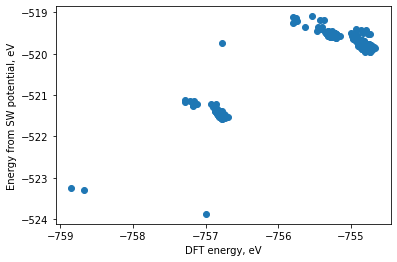

In [10]:
fig, ax = plt.subplots()
ax.scatter(dft_energies, sw_energies)
ax.set_xlabel("DFT energy, eV")
ax.set_ylabel("Energy from SW potential, eV");

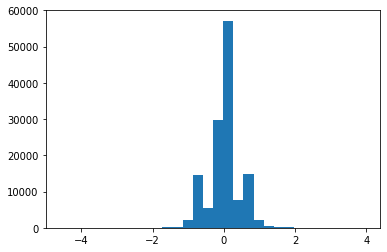

In [15]:
plt.hist(onp.array(sw_forces).ravel(), bins=30);

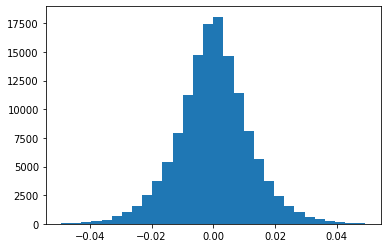

In [16]:
plt.hist(dft_forces.ravel(), bins=30);